In [1]:
import pandas as pd

Union = pd.read_excel("Union.xlsx", index_col="trade_date")
Intersection = pd.read_excel("Intersection.xlsx", index_col="trade_date")

In [2]:
Union

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
20140106,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140107,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140108,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140109,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140110,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140113,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140114,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20140115,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
from datetime import datetime, timedelta
import numpy as np

def change_columns_index(signal):
    new_names = {}
    for c in signal.columns:
        if c.endswith('SZ'):
            new_names[c] = c.replace('SZ', 'XSHE')
        elif c.endswith('SH'):
            new_names[c] = c.replace('SH', 'XSHG')
    signal = signal.rename_axis(new_names, axis=1)
    signal.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , signal.index))
    signal.index = pd.Index(map(lambda x: x+timedelta(hours=15) , signal.index))
    return signal

def get_daily_weight(data,period):
    data = data.fillna(0)
    weight_list = []
    for time_index, weight in data.iterrows():
        weight_result = (weight/weight.sum())
        weight_list.append(weight_result.to_dict())
    stock_df = pd.DataFrame(weight_list, index=data.index)
    if period>1:
        stock_df = pd.concat([pd.DataFrame(0,columns=stock_df.columns,index=list(range(1,period))),stock_df],axis=0)
    target = (pd.rolling_apply(stock_df, period, sum).dropna(how="all")/period).replace(0,np.nan)
    return target

In [4]:
Union_weight =  get_daily_weight(change_columns_index(Union),period=30)
Intersection_weight =  get_daily_weight(change_columns_index(Intersection),period=30)
Union_weight.head()

C:\ProgramData\Anaconda3\envs\qtc\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).apply(func=<builtin_function_or_method>,args=<tuple>,kwargs=<dict>)


,000001.XSHE,000002.XSHE,000008.XSHE,000009.XSHE,000012.XSHE,000024.XSHE,000027.XSHE,000039.XSHE,000046.XSHE,000060.XSHE,...,601992.XSHG,601997.XSHG,601998.XSHG,603000.XSHG,603160.XSHG,603288.XSHG,603699.XSHG,603858.XSHG,603885.XSHG,603993.XSHG
2014-01-03 15:00:00,0.000412,0.000412,NaN,NaN,NaN,0.000412,NaN,NaN,NaN,NaN,...,0.000412,NaN,0.000412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06 15:00:00,0.000412,0.000823,NaN,NaN,NaN,0.000823,NaN,NaN,NaN,NaN,...,0.000823,NaN,0.000412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07 15:00:00,0.000412,0.001235,NaN,NaN,0.000412,0.001235,NaN,NaN,NaN,NaN,...,0.001235,NaN,0.000412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08 15:00:00,0.000412,0.001622,NaN,NaN,0.000799,0.001622,NaN,NaN,NaN,NaN,...,0.001622,NaN,0.000412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09 15:00:00,0.000412,0.002024,NaN,NaN,0.000799,0.002024,NaN,NaN,NaN,NaN,...,0.002024,NaN,0.000412,NaN,NaN,NaN,NaN,NaN,NaN,NaN


并集组合（不对冲）

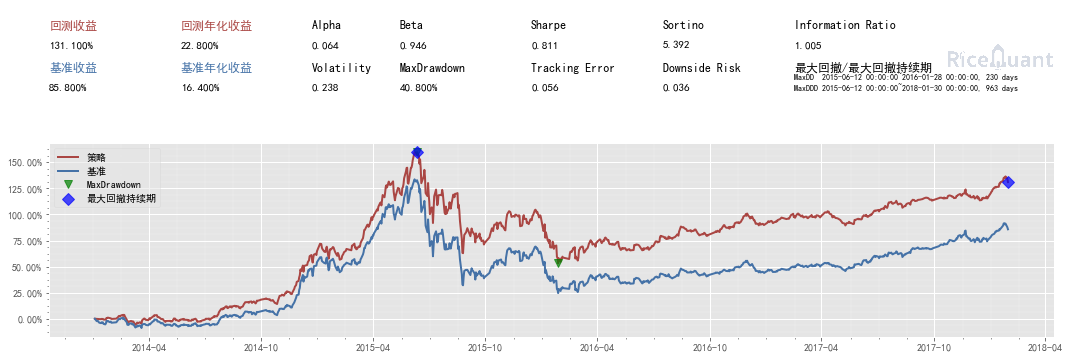

{'sys_analyser': {'benchmark_portfolio':              cash  market_value  static_unit_net_value  total_value  \
  date                                                                  
  2014-01-03  745.3    9999254.70                  1.000  10000000.00   
  2014-01-06  745.3    9771663.60                  1.000   9772408.90   
  2014-01-07  745.3    9768870.00                  0.977   9769615.30   
  2014-01-08  745.3    9785937.15                  0.977   9786682.45   
  2014-01-09  745.3    9699990.30                  0.979   9700735.60   
  2014-01-10  745.3    9624170.25                  0.970   9624915.55   
  2014-01-13  745.3    9575413.20                  0.962   9576158.50   
  2014-01-14  745.3    9659090.25                  0.958   9659835.55   
  2014-01-15  745.3    9642023.10                  0.966   9642768.40   
  2014-01-16  745.3    9654681.60                  0.964   9655426.90   
  2014-01-17  745.3    9509108.85                  0.966   9509854.15   
  2014-01-20

In [5]:
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.codes = Union_weight
    context.stocks = None
    context.pos_weight = 0.9
    scheduler.run_daily(find_pool)
    

def find_pool(context, bar_dict):
    try:
        codes = context.codes.loc[context.now].dropna()
        context.stocks = codes
    except:
        context.stocks = None

def handle_bar(context, bar_dict):
    buy(context, bar_dict)


def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        for ins, percentage in pool.items():
            order_target_percent(ins, percentage*context.pos_weight)
        for ins in context.portfolio.positions:
            if ins not in context.stocks:
                order_target_percent(ins, 0)

config = {
  "base": {
    "start_date": "2014-01-03",
    "end_date": "2018-01-31",
    "accounts": {'stock':10000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
    
  "mod": {
    "sys_analyser": {
      #"enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)

交集组合（不对冲）

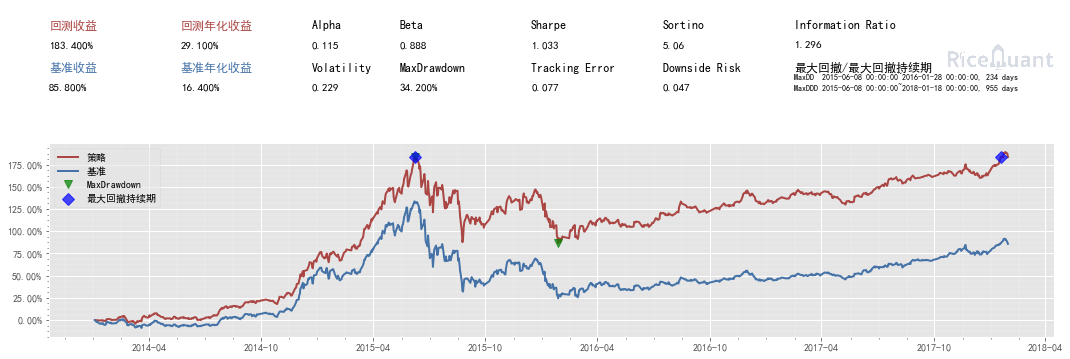

{'sys_analyser': {'benchmark_portfolio':              cash  market_value  static_unit_net_value  total_value  \
  date                                                                  
  2014-01-03  745.3    9999254.70                  1.000  10000000.00   
  2014-01-06  745.3    9771663.60                  1.000   9772408.90   
  2014-01-07  745.3    9768870.00                  0.977   9769615.30   
  2014-01-08  745.3    9785937.15                  0.977   9786682.45   
  2014-01-09  745.3    9699990.30                  0.979   9700735.60   
  2014-01-10  745.3    9624170.25                  0.970   9624915.55   
  2014-01-13  745.3    9575413.20                  0.962   9576158.50   
  2014-01-14  745.3    9659090.25                  0.958   9659835.55   
  2014-01-15  745.3    9642023.10                  0.966   9642768.40   
  2014-01-16  745.3    9654681.60                  0.964   9655426.90   
  2014-01-17  745.3    9509108.85                  0.966   9509854.15   
  2014-01-20

In [6]:
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.codes = Intersection_weight
    context.stocks = None
    context.pos_weight = 0.9
    scheduler.run_daily(find_pool)
    

def find_pool(context, bar_dict):
    try:
        codes = context.codes.loc[context.now].dropna()
        context.stocks = codes
    except:
        context.stocks = None

def handle_bar(context, bar_dict):
    buy(context, bar_dict)


def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        for ins, percentage in pool.items():
            order_target_percent(ins, percentage*context.pos_weight)
        for ins in context.portfolio.positions:
            if ins not in context.stocks:
                order_target_percent(ins, 0)

config = {
  "base": {
    "start_date": "2014-01-03",
    "end_date": "2018-01-31",
    "accounts": {'stock':10000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
    
  "mod": {
    "sys_analyser": {
      #"enabled": True,
      "plot": True
    },
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)